# Lets Cluster the fingerprints with new oxidation number fingerprints included

## Loading data and reading in formulas and fingerprints

By this point we already have the fingerprints for Ones,Z,Chi and oxidation number calculated. These are stored, along with the chemical formulae, in the file Fingerprint_lt50.csv in the data folder. Note that we only consider compounds where the total number of atoms in the unit cell <50 and for which oxidation number can be calculated.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
Df=pd.read_csv("../data/FingerPrint_lt50.csv",sep='\t',index_col=0)

In [6]:
Df.head()


Formula  Ones_1  Ones_2  Ones_3    Ones_4   Ones_5    Ones_6    Ones_7  \
0   Nb1 Ag1 O3    -1.0    -1.0    -1.0 -1.000000 -1.00000 -1.000000 -1.000000   
1   Li2 Ag6 O4    -1.0    -1.0    -1.0 -1.000000 -1.00000 -1.000000 -1.000000   
2  Cs2 Ag2 Cl4    -1.0    -1.0    -1.0 -1.000000 -1.00000 -1.000000 -1.000000   
3   Ag2 Hg1 I4    -1.0    -1.0    -1.0 -1.000000 -1.00000 -1.000000 -1.000000   
4    Ag2 C2 O6    -1.0    -1.0    -1.0 -0.999999 -0.99997 -0.999462 -0.993801   

     Ones_8    Ones_9    ...       Oxi_91    Oxi_92    Oxi_93    Oxi_94  \
0 -1.000000 -1.000000    ...    -0.012953 -0.095604 -0.104102 -0.183833   
1 -1.000000 -0.999999    ...    -0.097331 -0.222620 -0.219186 -0.149412   
2 -1.000000 -1.000000    ...     0.136590  0.131849 -0.020244 -0.112980   
3 -1.000000 -1.000000    ...    -0.055794 -0.147931 -0.240709 -0.256481   
4 -0.954192 -0.782973    ...    -0.153798 -0.262954 -0.317802 -0.218989   

     Oxi_95    Oxi_96    Oxi_97    Oxi_98    Oxi_99   Oxi_100  
0 -0.356473 -0.505818 -0.536482 -0.473015 -0.425665 -0.483642  
1 -0.046637  0.069006  0.131393  0.098103 -0.040059 -0.296037  
2 -0.003839  0.224747  0.338938  0.204959 -0.099369 -0.436527  
3 -0.141461  0.054555  0.253675  0.414680  0.427099  0.152495  
4  0.012370  0.284588  0.437742  0.290560 -0.120417 -0.541639  

[5 rows x 401 columns]

We load up all the formulas and the fingerprints and check that they have the correct shapes

In [7]:
Formulas=Df["Formula"].values

In [8]:
Fingerprint=Df.drop("Formula",axis=1).values

In [6]:
Fingerprint.shape

(14722, 400)

In [7]:
Formulas.shape

(14722,)

## Checking how many components of PCA we need

We perform hundred component PCA on the fingerprints and then check the number of components we want to keep in order to retain a large part of the covariance. We plot the total covariance captured as a function of number of components kept in the plot below

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca=PCA(n_components=100)

In [11]:
pca_fing=pca.fit_transform(Fingerprint)

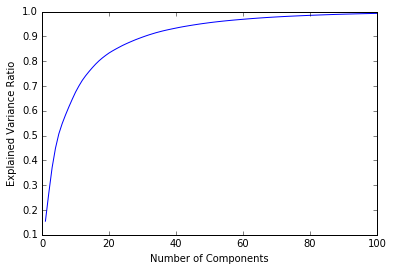

In [13]:
plt.plot(np.arange(1,101),np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Number of Components")

We enumerate the elements of the plot below

In [12]:
list(enumerate(np.cumsum(pca.explained_variance_ratio_)))

[(0, 0.15492476023975613),
 (1, 0.26728530460418154),
 (2, 0.37097694951145038),
 (3, 0.44911330754675549),
 (4, 0.50686173834960302),
 (5, 0.54818714088119103),
 (6, 0.58323300926758548),
 (7, 0.61567526741159406),
 (8, 0.64623301261143551),
 (9, 0.6753853103743449),
 (10, 0.70011819172487566),
 (11, 0.72254301595249826),
 (12, 0.74121355408205825),
 (13, 0.7579571516374779),
 (14, 0.77366155752734567),
 (15, 0.78832712266163718),
 (16, 0.80150606731796237),
 (17, 0.8130421783532743),
 (18, 0.82345035235024044),
 (19, 0.83304796471075315),
 (20, 0.84128592259890633),
 (21, 0.84891253858063653),
 (22, 0.85612295472810085),
 (23, 0.86324319793702187),
 (24, 0.86963881334327131),
 (25, 0.87567663526488293),
 (26, 0.8814613061272828),
 (27, 0.88708658630136927),
 (28, 0.89220666872309595),
 (29, 0.89720519583809344),
 (30, 0.90199058325264481),
 (31, 0.90650415919498806),
 (32, 0.910664538351043),
 (33, 0.91475877696229735),
 (34, 0.91832314786481828),
 (35, 0.92184296738755589),
 (36, 0.

With 50 components we might already be pushing the limits for DBSCAN clustering which we need to try. So lets stick to 50 and then ramp it up if necessary. We are capturing almost 96% of the covariance in this scenario

In [13]:
pca_fing50=pca_fing[:,0:50]

## Clustering using Kmeans 

We perform 15 cluster Kmeans on this 50 component pca fingerprint to get representative clusters.

In [14]:
from sklearn.cluster import KMeans

In [15]:
Km=KMeans(n_clusters=15,random_state=42,n_init=50)

In [16]:
clust_km50=Km.fit_predict(pca_fing50)


We output the number of elements in each cluster

In [17]:
from collections import Counter
print Counter(clust_km50)

Counter({5: 1690, 2: 1595, 11: 1459, 0: 1407, 6: 1276, 13: 1251, 10: 1229, 1: 868, 8: 822, 12: 818, 7: 777, 3: 601, 4: 550, 14: 283, 9: 96})


## Sorting the cluster centers in order of distance from cluster 0 to obtain dissimilarity matrix

We rename the clusters in ascending order based on distance from cluster 0. Then we reorder the fingerprints by cluster number and then compute similarity matrix based on the euclidean distance

In [147]:
from sklearn.metrics.pairwise import euclidean_distances

Using Pandas sorting routines to sort the Fingerprints.

In [19]:
dist_center=euclidean_distances(Km.cluster_centers_,Km.cluster_centers_[0])

dist_sorted=sorted(dist_center)
sort_key=[]
for i in range(15):
    sort_key.append(np.where(dist_center==dist_sorted[i])[0][0])


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [20]:
clust_km50_s=np.zeros(len(clust_km50))
for i in range(15):
    clust_km50_s[clust_km50==sort_key[i]]=int(i)

In [21]:
Counter(clust_km50_s)

Counter({0.0: 1407,
         1.0: 1595,
         2.0: 1690,
         3.0: 1251,
         4.0: 1229,
         5.0: 601,
         6.0: 1459,
         7.0: 1276,
         8.0: 822,
         9.0: 868,
         10.0: 550,
         11.0: 818,
         12.0: 283,
         13.0: 777,
         14.0: 96})

In [22]:
Df["clust_pca50"]=clust_km50_s

In [23]:
Df_sorted=Df.sort_values(by="clust_pca50")

In [24]:
Formula_s=Df_sorted["Formula"]

In [25]:
Finger_s=Df_sorted.drop(["Formula","clust_pca50"],axis=1).values

In [26]:
Finger_s.shape

(14722, 400)

We now perform pca on this new sorted set of fingerprints. We could have just sorted the earlier pca fingerprints instead, however PCA is cheap and we did not have the PCA fingerprints in the pandas dataframe

In [27]:
pca2=PCA(n_components=50)
fing_pca50_s=pca2.fit_transform(Finger_s)
print np.sum(pca2.explained_variance_ratio_)

0.955332866735


We now calculate eulidean distances and plot the similarity matrix

In [28]:
dist_fing_s=euclidean_distances(fing_pca50_s)

In [29]:
np.amax(dist_fing_s)

21.518883998765343

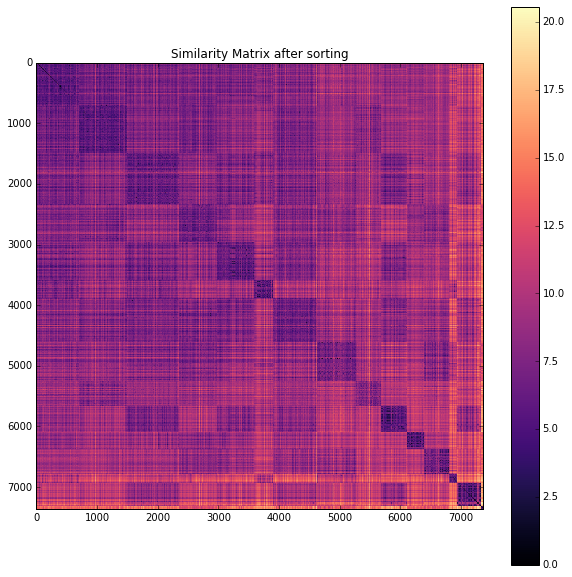

In [31]:
clust_km50_s=Df_sorted["clust_pca50"].values
#fing_714=Finger_s[clust_km50_s>6]
#dist_fing_714=euclidean_distances(fing_714)
plt.figure(figsize=(10,10))
plt.imshow(dist_fing_s[::2,::2],cmap=plt.cm.magma)
plt.title("Similarity Matrix after sorting")
plt.colorbar()

# Let us try to estimate eps and number of elements for DBSCAN from one tight cluster (cluster 13)

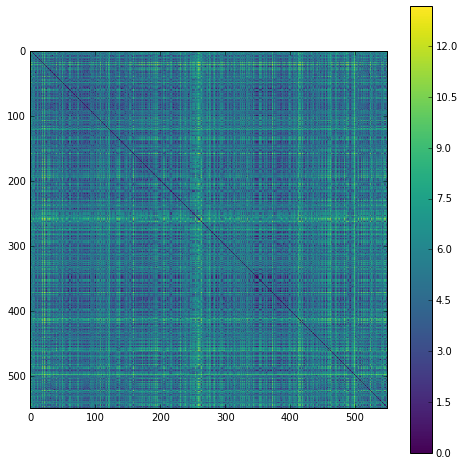

In [32]:
fing_13=fing_pca50_s[clust_km50_s==10]
plt.figure(figsize=(8,8))
plt.imshow(euclidean_distances(fing_13),cmap=plt.cm.viridis)
plt.colorbar()

   ## Testing DBSCAN (This didn't work so well)
   I basically searched over a lot of eps and min_smaples values but never ended up getting very useful clusters. Either the number of unclassified points was too high or the clustering was terrible. We should probably do a proper GridSearchCV on this, but then the validation score isnt well defined. Most of the cells have been deleted in this section
   
Thought for later: Maybe use the adjusted_rand_score with the Kmens clusters as a validation metric.  

In [71]:
from sklearn.cluster import DBSCAN

In [89]:
Db=DBSCAN(eps=1.5,min_samples=5,metric='precomputed')

In [90]:
for eps in np.linspace(0.5,12.0,25):
    Db.eps=eps
    clust_db=Db.fit_predict(dist_fing_s)
    print eps, Counter(clust_db)[-1], np.amax(clust_db) 

0.5 14535 23
0.979166666667 13102 138
1.45833333333 10827 270
1.9375 8567 328
2.41666666667 6106 303
2.89583333333 3585 185
3.375 1979 85
3.85416666667 1043 47
4.33333333333 536 20
4.8125 236 6
5.29166666667 120 1
5.77083333333 53 0
6.25 20 0


KeyboardInterrupt: 

## DBSCAN seems difficult to converge. Lets try Agglomerative CLustering

Another sensational Failure. The dataset is way too large and no reasonable number of clusters ever finishes running. 
May need to look into hyper-parameters more in depth, but nothing looks incredibly promising

In [161]:
from sklearn.cluster import AgglomerativeClustering

In [162]:
Ag=AgglomerativeClustering(n_clusters=5)


In [ ]:
clust_ag=Ag.fit_predict(fing_pca50_s[:,0:10])

#  Lets stick to kmeans and try other metrics

The Similarity matrix based on cosine distances looks rather prettier than the one based on euclidean distances

In [33]:
from sklearn.metrics.pairwise import cosine_distances

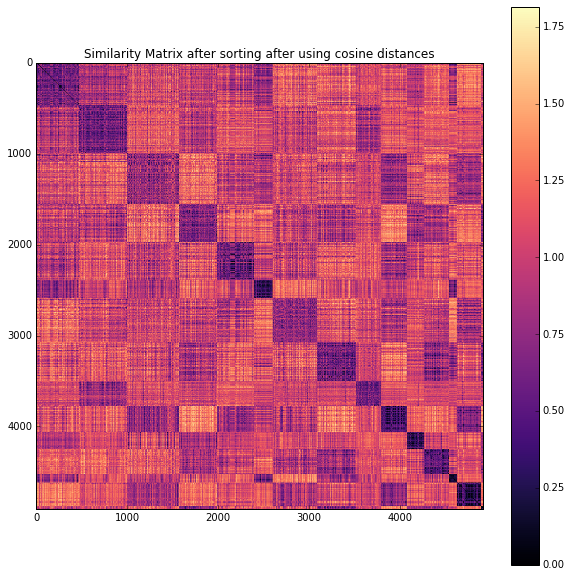

In [35]:
clust_km50_s=Df_sorted["clust_pca50"].values
dist_cosine_s=cosine_distances(fing_pca50_s)
plt.figure(figsize=(10,10))
plt.imshow(dist_cosine_s[::3,::3],cmap=plt.cm.magma)
plt.title("Similarity Matrix after sorting after using cosine distances")
plt.colorbar()

Note that in the plot above we plot every second column and row because imshow otherwise took too long

# Lets try 20 cluster Kmeans

We redo all the steps above for Kmeans with 20 clusters. Nothing super dramatic happens but the clusters tighten up a little bit, as expected

In [36]:
Km2=KMeans(n_clusters=20, random_state=42,n_init=50)

In [37]:
clust_km50_20=Km2.fit_predict(pca_fing50)

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
Counter(clust_km50_20)

Counter({0: 1072,
         1: 96,
         2: 1291,
         3: 284,
         4: 927,
         5: 920,
         6: 165,
         7: 417,
         8: 1196,
         9: 776,
         10: 569,
         11: 383,
         12: 566,
         13: 440,
         14: 581,
         15: 1242,
         16: 1088,
         17: 562,
         18: 832,
         19: 1315})

Lets reorder by this 20 cluster kmeans

In [40]:
dist_center2=euclidean_distances(Km2.cluster_centers_,Km2.cluster_centers_[0])

dist_sorted2=sorted(dist_center2)
sort_key2=[]
for i in range(20):
    sort_key2.append(np.where(dist_center2==dist_sorted2[i])[0][0])

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [41]:
print sort_key2

[0, 8, 5, 4, 15, 19, 18, 10, 2, 16, 14, 9, 12, 17, 13, 11, 3, 6, 7, 1]


In [42]:
clust_km50_s2=np.zeros(len(clust_km50_20),dtype=int)
for i in range(20):
    clust_km50_s2[clust_km50_20==sort_key2[i]]=int(i)

In [43]:
Counter(clust_km50_s2)

Counter({0: 1072,
         1: 1196,
         2: 920,
         3: 927,
         4: 1242,
         5: 1315,
         6: 832,
         7: 569,
         8: 1291,
         9: 1088,
         10: 581,
         11: 776,
         12: 566,
         13: 562,
         14: 440,
         15: 383,
         16: 284,
         17: 165,
         18: 417,
         19: 96})

In [44]:
Df["clust_pca50_20"]=clust_km50_s2

In [45]:
Df_sorted2=Df.sort_values(by="clust_pca50_20")

In [46]:
Df_sorted2.head()

Formula  Ones_1  Ones_2  Ones_3  Ones_4  Ones_5  Ones_6  Ones_7  \
9696    Na2 Ta6 O16    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0   
2340     Ba1 Er2 F8    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0   
11096  Pr12 Re4 O32    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0   
5159     Fe1 Sn1 F6    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0   
13213   Mn2 Cd2 F10    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0   

         Ones_8    Ones_9       ...          Oxi_93    Oxi_94    Oxi_95  \
9696  -1.000000 -1.000000       ...       -0.311716 -0.355335 -0.296676   
2340  -1.000000 -1.000000       ...        0.081689  0.064050  0.008039   
11096 -1.000000 -0.999995       ...        0.100897  0.070573 -0.004767   
5159  -1.000000 -0.999999       ...       -0.200641 -0.036734  0.101498   
13213 -0.999999 -0.999985       ...       -0.015693 -0.070280 -0.091334   

         Oxi_96    Oxi_97    Oxi_98    Oxi_99   Oxi_100  clust_pca50  \
9696  -0.130305  0.056547  0.137849  0.036604 -0.228062          5.0   
2340  -0.048995 -0.056819 -0.026578 -0.052168 -0.227748          0.0   
11096 -0.091327 -0.136998 -0.160468 -0.249889 -0.447702          0.0   
5159   0.146109  0.092443 -0.029515 -0.178233 -0.362784          0.0   
13213 -0.093592 -0.097708 -0.114368 -0.194406 -0.391995          0.0   

       clust_pca50_20  
9696                0  
2340                0  
11096               0  
5159                0  
13213               0  

[5 rows x 403 columns]

In [47]:
Formula_s2=Df_sorted2["Formula"]
Finger_s2=Df_sorted2.drop(["Formula","clust_pca50","clust_pca50_20"],axis=1).values

In [97]:
Finger_s2.shape

(14722, 400)

In [49]:
pca3=PCA(n_components=50)
finger_pca_s2=pca3.fit_transform(Finger_s2)

In [50]:
dist_fing_s2=euclidean_distances(finger_pca_s2)

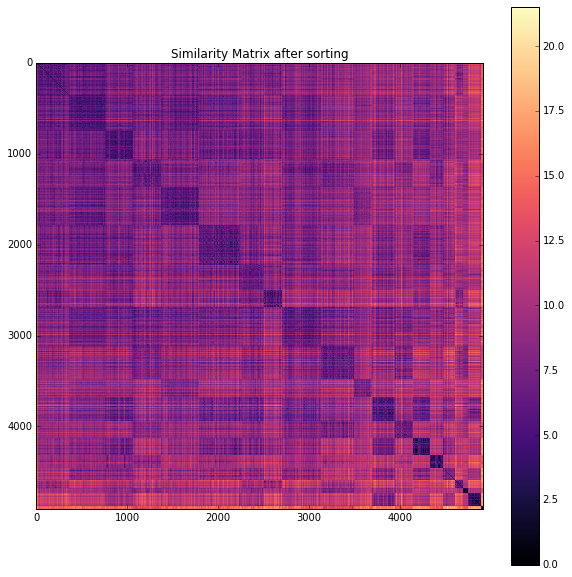

In [51]:
plt.figure(figsize=(10,10))
plt.imshow(dist_fing_s2[::3,::3],cmap=plt.cm.magma)
plt.title("Similarity Matrix after sorting")
plt.colorbar()

In [52]:
dist_cosine_s2=cosine_distances(finger_pca_s2)

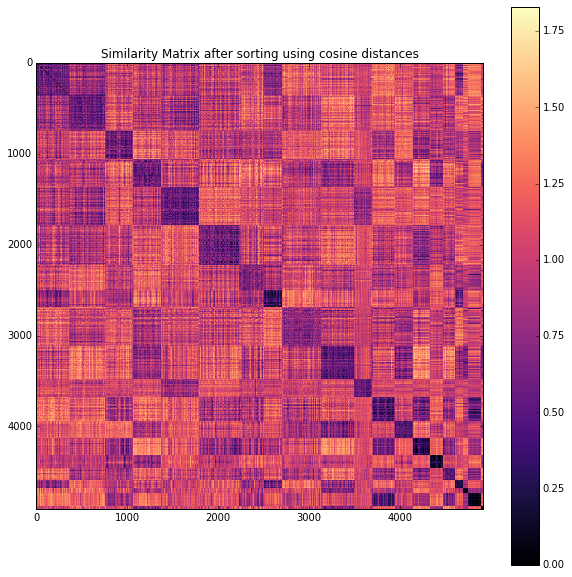

In [148]:
plt.figure(figsize=(10,10))
plt.imshow(dist_cosine_s2[::3,::3],cmap=plt.cm.magma)
plt.title("Similarity Matrix after sorting using cosine distances")
plt.colorbar()

# Lets try DBSCAN with the cosine distances

My terrible luck with DBSCAN continues. Basically because the similarity matrix looked tighter with cosine distances, I tried DBSCAN with cosine distances. The same problems as earlier persist though

In [55]:
from sklearn.cluster import DBSCAN
Db_try=DBSCAN(eps=0.1,min_samples=5,metric='precomputed')

In [104]:
Db_try.eps=0.12
Db_try.min_samples=9
Db_cluster_cos=Db_try.fit_predict(dist_cosine_s2)
print Counter(Db_cluster_cos)


Counter({-1: 6025, 13: 3448, 1: 1118, 84: 862, 0: 849, 113: 165, 34: 116, 68: 95, 29: 93, 114: 90, 37: 77, 65: 71, 4: 58, 94: 55, 22: 52, 110: 43, 69: 36, 67: 34, 41: 33, 27: 32, 75: 30, 59: 28, 101: 28, 76: 27, 98: 27, 111: 27, 5: 25, 96: 25, 8: 24, 46: 24, 56: 24, 58: 24, 2: 23, 38: 23, 23: 22, 109: 22, 35: 20, 47: 18, 54: 18, 90: 18, 17: 17, 24: 17, 30: 17, 44: 17, 11: 16, 36: 16, 112: 16, 9: 15, 48: 15, 53: 15, 64: 15, 72: 15, 85: 15, 104: 15, 106: 15, 3: 14, 7: 14, 19: 14, 25: 14, 66: 14, 91: 14, 93: 14, 6: 13, 12: 13, 57: 13, 73: 13, 79: 13, 83: 13, 97: 13, 102: 13, 42: 12, 74: 12, 78: 12, 82: 12, 26: 11, 43: 11, 50: 11, 60: 11, 70: 11, 71: 11, 81: 11, 108: 11, 14: 10, 15: 10, 16: 10, 20: 10, 21: 10, 31: 10, 40: 10, 45: 10, 52: 10, 61: 10, 62: 10, 77: 10, 80: 10, 86: 10, 87: 10, 88: 10, 95: 10, 100: 10, 10: 9, 18: 9, 28: 9, 32: 9, 33: 9, 55: 9, 89: 9, 92: 9, 99: 9, 103: 9, 107: 9, 105: 8, 39: 7, 51: 7, 63: 7, 115: 7, 49: 4})


In [75]:
Counter(Db_cluster_cos)

Counter({-1: 4723,
         0: 8377,
         1: 38,
         2: 14,
         3: 58,
         4: 27,
         5: 15,
         6: 17,
         7: 14,
         8: 17,
         9: 14,
         10: 44,
         11: 13,
         12: 19,
         13: 11,
         14: 39,
         15: 33,
         16: 16,
         17: 19,
         18: 11,
         19: 26,
         20: 24,
         21: 88,
         22: 13,
         23: 35,
         24: 14,
         25: 8,
         26: 45,
         27: 24,
         28: 11,
         29: 32,
         30: 11,
         31: 24,
         32: 16,
         33: 11,
         34: 15,
         35: 19,
         36: 16,
         37: 11,
         38: 14,
         39: 44,
         40: 20,
         41: 137,
         42: 11,
         43: 21,
         44: 7,
         45: 17,
         46: 46,
         47: 32,
         48: 27,
         49: 12,
         50: 13,
         51: 11,
         52: 11,
         53: 16,
         54: 10,
         55: 11,
         56: 12,
         57: 11,
    

## Vanity Project: Testing out label propogation

We label the first 10 elements of each of the 15 cluster KMeans with the cluster number and see how Kmeans compares with label propogation. The resulting similarity matrix ( after resorting) is actually pretty reasonable. But Kmeans still gives you the prettiest clusters

In [138]:
Ylabel=np.ones(len(clust_km50_s),dtype=int)*-1
Ylabel[0:10]=0
for i in range(1,15):
    Ylabel[np.where(clust_km50_s==i)[0][0:10]]=i
    
    

In [139]:
from sklearn.semi_supervised import LabelPropagation
Lab=LabelPropagation()

In [140]:
Lab=LabelPropagation(gamma=0.5)
Lab.fit(fing_pca50_s,Ylabel)
clusts_lab=Lab.predict(fing_pca50_s)
Counter(clusts_lab)

Counter({0: 1296,
         1: 1446,
         2: 1053,
         3: 1446,
         4: 1015,
         5: 837,
         6: 1040,
         7: 967,
         8: 706,
         9: 879,
         10: 1245,
         11: 1092,
         12: 277,
         13: 1330,
         14: 93})

In [127]:
from sklearn.metrics import adjusted_rand_score,confusion_matrix,accuracy_score

In [141]:
confusion_matrix(clust_km50_s,clusts_lab)

array([[ 990,   83,   13,   75,   38,  153,    4,   23,    0,    0,   27,
           0,    0,    1,    0],
       [  76, 1130,    0,  240,    0,    1,   61,    4,   72,    3,    8,
           0,    0,    0,    0],
       [  75,   17,  670,    1,   50,  112,    1,   75,   11,   14,  463,
           2,    0,  199,    0],
       [  15,    7,    2,  873,   22,    0,   81,   23,    5,    0,  212,
          11,    0,    0,    0],
       [  91,    3,   33,    4,  871,    1,   26,   35,    0,  106,    8,
           1,    0,   50,    0],
       [   6,    0,   19,    0,    0,  558,    0,    0,    0,    0,    0,
           4,   14,    0,    0],
       [   9,   78,  138,  138,   11,    0,  804,   32,    3,   96,    4,
          42,    0,  104,    0],
       [   5,    0,  156,   57,    5,    3,    7,  753,    1,    0,    3,
         281,    3,    2,    0],
       [   9,  128,    4,   11,    8,    8,   29,    3,  613,    0,    0,
           0,    0,    9,    0],
       [   1,    0,   13,    0,    0,

In [142]:
adjusted_rand_score(clust_km50_s,clusts_lab)

0.46570994459981463

In [143]:
Counter(clusts_lab)

Counter({0: 1296,
         1: 1446,
         2: 1053,
         3: 1446,
         4: 1015,
         5: 837,
         6: 1040,
         7: 967,
         8: 706,
         9: 879,
         10: 1245,
         11: 1092,
         12: 277,
         13: 1330,
         14: 93})

In [144]:
Df_sorted["clust_lab"]=clusts_lab

In [133]:
Df_sorted.columns

Index([u'Formula', u'Ones_1', u'Ones_2', u'Ones_3', u'Ones_4', u'Ones_5',
       u'Ones_6', u'Ones_7', u'Ones_8', u'Ones_9',
       ...
       u'Oxi_93', u'Oxi_94', u'Oxi_95', u'Oxi_96', u'Oxi_97', u'Oxi_98',
       u'Oxi_99', u'Oxi_100', u'clust_pca50', u'clust_lab'],
      dtype='object', length=403)

In [145]:
Df_sort_lab=Df_sorted.sort_values(by="clust_lab")
fing_lab_s=Df_sort_lab.drop(['Formula','clust_pca50','clust_lab'],axis=1).values
pca4=PCA(n_components=50)
fing_lab_pca_s=pca4.fit_transform(fing_lab_s)
dist_lab_cos_s=cosine_distances(fing_lab_pca_s)


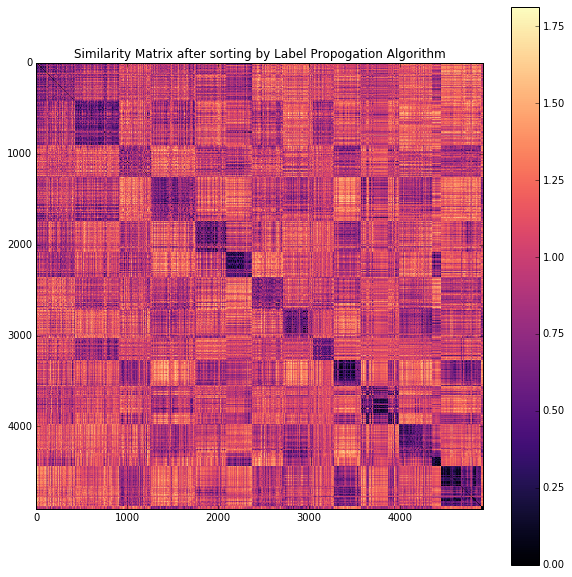

In [149]:
plt.figure(figsize=(10,10))
plt.imshow(dist_lab_cos_s[::3,::3],cmap=plt.cm.magma)
plt.title("Similarity Matrix after sorting by Label Propogation Algorithm")
plt.colorbar()

Note that this is no way means Kmeans is awesome or that Label Propogation sucks. We were using the Kmeans labels to label things, so the best it could do was reproduce Kmeans, more or less. It is actually impressive that it gives pretty reasonable results. Higher number of labels would help, but this is not worth redoing as we know what we will get